### Based upon the features in Titanic DataSet we need to check wheather the person is survived or not survived.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#will take all graphs in one page only
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#sklearn package's randomized data splitting function
#test_train function used in all supervised learning algorithm

In [2]:
mydata=pd.read_csv('titanic-training-data.csv')
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
mydata.shape

(891, 12)

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
mydata.isnull().sum()
#so many missingvalue in Age and Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Survived is Dependent Variable
#### Survived is categorical variable thats why we use Classification here
#### PassengerID, Ticker No., Fare, Name are not required for Analysis
#### PClass : Ordinal Data(Categorical)/ First Class, Second Class and all.....
#### Sex : Categorical Data (one hot encoding)
#### SibSp: Sibling or Spouse / Wheather the person travel alone or with spouse

#### Parch : Parent or Child , 0 means person is travelling alone and 1 or 2 means person is travelling with his/her parents or child(their Number)
#### Embarked: Place from which Port the person has boarded (its S,C and Q)


In [6]:
mydata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

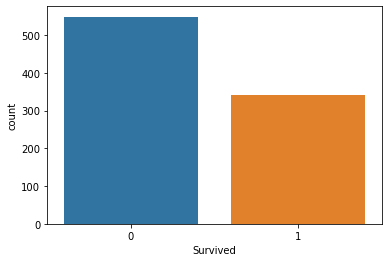

In [7]:
sns.countplot(x="Survived",data=mydata)
#550 people not survived and around 350 survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

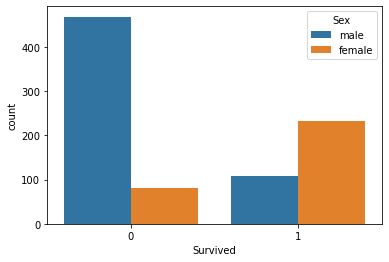

In [8]:
sns.countplot(x="Survived",hue="Sex",data=mydata)
#for tabular form we use crosstab from Pandas

<AxesSubplot:xlabel='Survived', ylabel='count'>

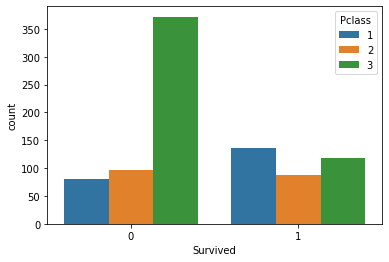

In [9]:
sns.countplot(x="Survived",hue="Pclass",data=mydata)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

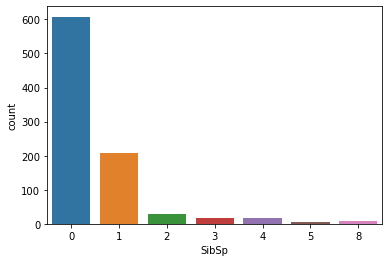

In [10]:
sns.countplot(x="SibSp",data=mydata)


In [11]:
mydata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

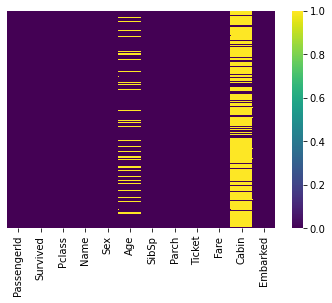

In [12]:
sns.heatmap(mydata.isnull(),yticklabels=False,cmap="viridis")
#cmap="viridis" name of colour map
#yticklabels=False,It will not shows the y axis labels

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

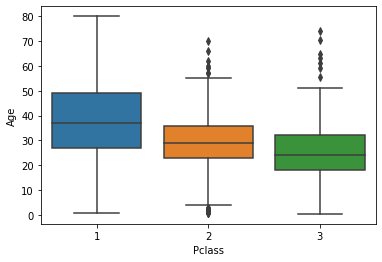

In [13]:
sns.boxplot(x="Pclass",y="Age",data=mydata)

In [14]:
mydata.drop("Cabin",axis=1,inplace=True)
#mydata=mydata.drop("Cabin",axis=1) both are same code
#We can't handle with Cabin column as it have 687 missing data,so better to drop this column form DataFrame
#inplace =True,Basically removing Cabin column from mydata(main Data Frame) without using # code

In [15]:
mydata.dropna(inplace=True)
#here we dropping all rows which consist NA or Missing value
#we can even assign median or mode value to those NA value thats totally our call

<AxesSubplot:>

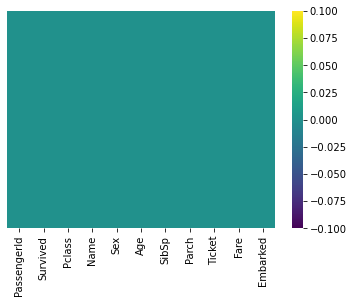

In [16]:
sns.heatmap(mydata.isnull(),yticklabels=False,cmap="viridis")
#Now there is no missing value
#No horizontal line in heatmap


In [17]:
mydata.shape

(712, 11)

In [18]:
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### One hot encoding

In [19]:
Sex=pd.get_dummies(mydata["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


With the help of male status only we can identify that the person is male or female.thats why we are dropping female (first column) here as its not required for analysis

In [20]:
Sex=pd.get_dummies(mydata["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embark=pd.get_dummies(mydata["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
embark=pd.get_dummies(mydata["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
Pcl=pd.get_dummies(mydata["Pclass"])
Pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [24]:
Pcl=pd.get_dummies(mydata["Pclass"],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [25]:
mydata=pd.concat([mydata,Sex,embark,Pcl],axis=1)
mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


#### Removing all Irrelavent column from DataFrame

In [26]:
mydata.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass","Fare"],axis=1,inplace=True)
mydata.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


### Split the Data

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
X=mydata.drop("Survived",axis=1)
y=mydata["Survived"]
#y=mydata.pop("Survived")
#line 2nd code and line 3rd represent the same code here


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)


## Fit the Model

In [30]:
model=LogisticRegression()
#shift+Tab and check Solver and its type
#according to type of data different Solver can be used(its like hyperparameter only)
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
predictions=model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
#Here We Basically compare y_test with the predictions value that we get from our model
#accuracy_score tells about accuracy of our model
accuracy_score(y_test,predictions)

0.7757009345794392

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       126
           1       0.73      0.73      0.73        88

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [35]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [36]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))
#overfitted Model

0.9598393574297188
0.7570093457943925


### Criterion is entropy not gini

In [37]:
dTree1 = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [38]:
print(dTree1.score(X_train, y_train))
print(dTree1.score(X_test, y_test))

0.9598393574297188
0.7570093457943925


## Reducing over fitting (Regularization)

change max_depth value and get the better score
by doing this we can stop overfitting step here
#### max_depth is basically number of max branch which we wanted to take
#### Training and Testing data result should be more or less same, it indicate the best possible model here (that too with high accurcay)

In [39]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8032128514056225
0.7990654205607477


0.7990654205607477


<AxesSubplot:>

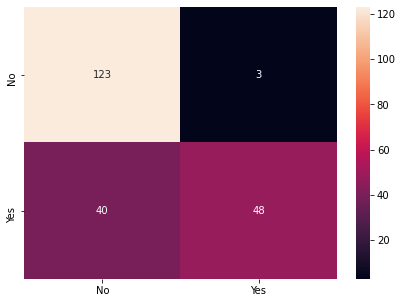

In [40]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


## Bagging

Training with Training DataSet
#### n_estimators tells us about the number of Decision Tree that taken into consideration

In [41]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=4,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Predicting(Testing) with Testing DataSet

0.7710280373831776


<AxesSubplot:>

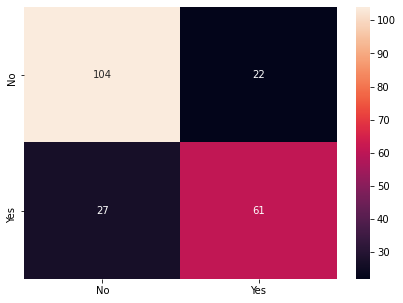

In [42]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


## Ensemble Learning - AdaBoosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=4, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.780373831775701


<AxesSubplot:>

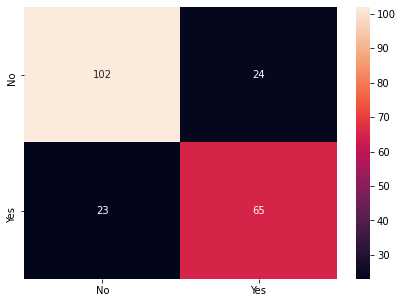

In [44]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Ensemble Learning - GradientBoost


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 10,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8037383177570093


<AxesSubplot:>

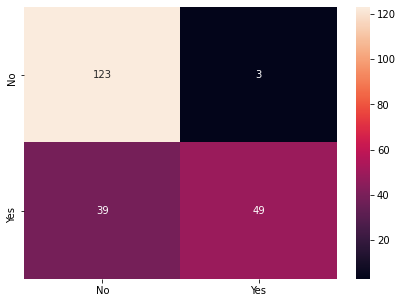

In [46]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Ensemble RandomForest Classifier

In [47]:
mydata.shape

(712, 9)

n_estimators means number of Decision Trees
max_features=root(9)=3


In [48]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=3)
rfcl = rfcl.fit(X_train, y_train)

0.7710280373831776


<AxesSubplot:>

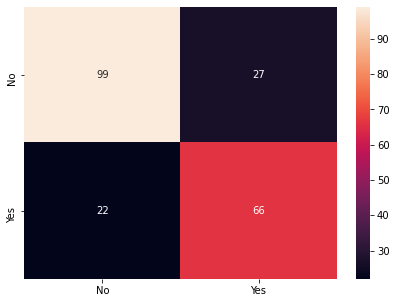

In [49]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')